In [1]:
import astropy.units as u
import astropy.coordinates as coord
import matplotlib.pyplot as plt
import numpy as np
import gala.integrate as gi
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

First, define a gravitational potential.

In [2]:
pot = gp.MilkyWayPotential()

Select a star.

In [3]:
hvs1 = coord.SkyCoord(
    ra=136.93746493225 * u.degree,
    dec=2.75190851109 * u.degree,
    distance=102.24 * u.kpc,
    pm_ra_cosdec=-0.60 * (u.mas / u.yr),
    pm_dec=-0.47 * (u.mas / u.yr),
    radial_velocity=0.37 * (u.km / u.s),
    frame="icrs"
)
GC = hvs1.transform_to(coord.Galactocentric)

Set initial conditions and specify time-stepping

In [4]:
ics = gd.PhaseSpacePosition(pos=GC.cartesian.xyz, vel=GC.velocity.d_xyz)
orbit = pot.integrate_orbit(ics, dt=1*u.Myr, n_steps=100)

Integrating orbits in parallel

In [5]:
norbits = 128
new_pos = np.random.normal(ics.pos.xyz.to(u.pc).value, 100., size=(norbits,3)).T * u.pc
new_vel = np.random.normal(ics.vel.d_xyz.to(u.km/u.s).value, 1., size=(norbits,3)).T * u.km/u.s
new_ics = gd.PhaseSpacePosition(pos=new_pos, vel=new_vel)
orbits = pot.integrate_orbit(new_ics, dt=1., n_steps=100)

Plot the first particle

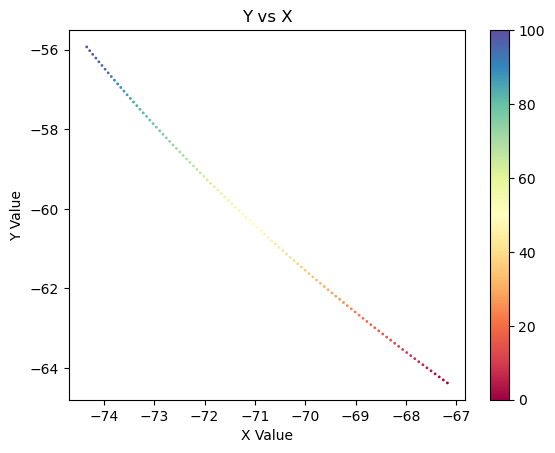

In [6]:
times = np.arange(orbits.ntimes)
pos_output = orbits[:,0].pos.xyz.value

plt.figure()
plt.scatter(pos_output[0,:], pos_output[1,:],
            c=times, cmap='Spectral',s=1)
plt.colorbar()
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Y vs X')
plt.show()